<a href="https://colab.research.google.com/github/whoisprakhar44/whoisprakhar44/blob/main/boston_housing_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# importing the Boston Housing dataset from Tensorflow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing.npz',
                                                                                  test_split =0.2,
                                                                                  seed = 42)

In [30]:
# checking the shape of the data
X_train.shape, y_train.shape

((404, 13), (404,))

In [47]:
y_test[0]

22.4

In [49]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
1,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27
2,6.65492,0.0,18.10,0.0,0.713,6.317,83.0,2.7344,24.0,666.0,20.2,396.90,13.99
3,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
4,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
98,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
99,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
100,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [65]:
# without using Normalized Data
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1),
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['mae'])

history = model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 121.3621 - mae: 121.3621
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 23.6923 - mae: 23.6923
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 11.0274 - mae: 11.0274
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 6.5871 - mae: 6.5871
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 6.6411 - mae: 6.6411
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 6.6998 - mae: 6.6998
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 7.2294 - mae: 7.2294
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 7.8221 - mae: 7.8221
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 7.7944 - mae: 7.7944
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 7.5917 - mae: 7.5917
Epoch 11/100
13/13 [==============================]

In [66]:
model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.7095 - mae: 3.7095


[3.709460735321045, 3.709460735321045]

In [67]:
model_1.predict([[0.21719	,0.0	,10.59	,1.0	,0.489	,5.807	,53.8	,3.6526	,4.0	,277.0	,18.6	,390.94,16.03]])

array([[20.520199]], dtype=float32)

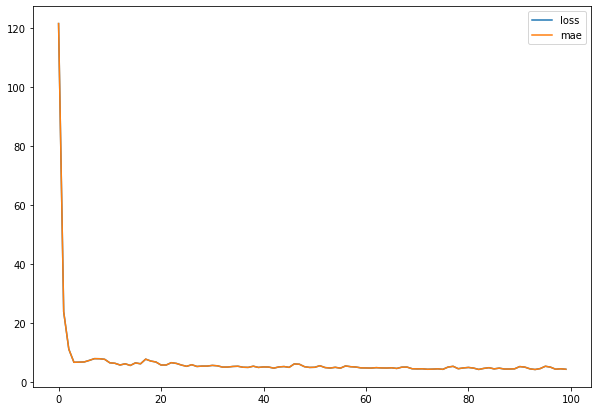

In [68]:
pd.DataFrame(history.history).plot(figsize=[10,7])

In [120]:
# using Normalized Data
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train_normal = norm.fit_transform(X_train)
X_test_normal = norm.transform(X_test)
#y_train_normal = norm_y.fit_transform(tf.expand_dims(y_train, axis=1))
#y_test_normal = norm_y.transform(tf.expand_dims(y_test, axis=1))

In [110]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(50, 'relu'),
                               tf.keras.layers.Dense(50, 'relu'),
                               #tf.keras.layers.Dense(50, 'relu'),
                               tf.keras.layers.Dense(1),
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['mae'])

history = model_2.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 18.4412 - mae: 18.4412
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 9.3580 - mae: 9.3580
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 6.3355 - mae: 6.3355
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 5.0970 - mae: 5.0970
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 4.6903 - mae: 4.6903
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 4.2269 - mae: 4.2269
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 3.8252 - mae: 3.8252
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 3.5097 - mae: 3.5097
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 3.2078 - mae: 3.2078
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 3.0807 - mae: 3.0807
Epoch 11/100
13/13 [==============================] - 0s 

In [111]:
model_2.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.4961 - mae: 2.4961


[2.4961256980895996, 2.4961256980895996]

In [112]:
model_2.predict(norm.transform([[0.21719	,0.0	,10.59	,1.0	,0.489	,5.807	,53.8	,3.6526	,4.0	,277.0	,18.6	,390.94,16.03]]))

array([[22.486725]], dtype=float32)

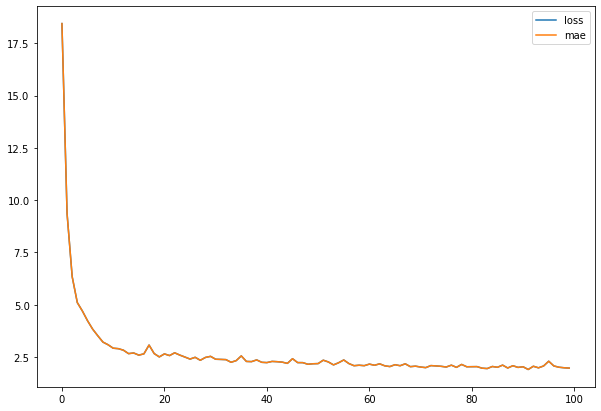

In [126]:
from IPython.core.pylabtools import figsize
pd.DataFrame(history.history).plot(figsize=[10,7])

4 layers weren't helpin much so I reduced the layers to keep it less complex

as we've seen Normalization plays quite an important role in gettin the good results

In [123]:
y_pred = model_2.predict(X_test_normal)

In [124]:
tf.keras.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred)).numpy()

12.85861